## 1. Importar las librerías necesarias 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 2. Introducir los datos

In [3]:
data = pd.read_csv('../data/raw/youtoxic.csv')
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


### Comprobar si las etiquetas están equilibradas

<AxesSubplot: xlabel='IsToxic', ylabel='count'>

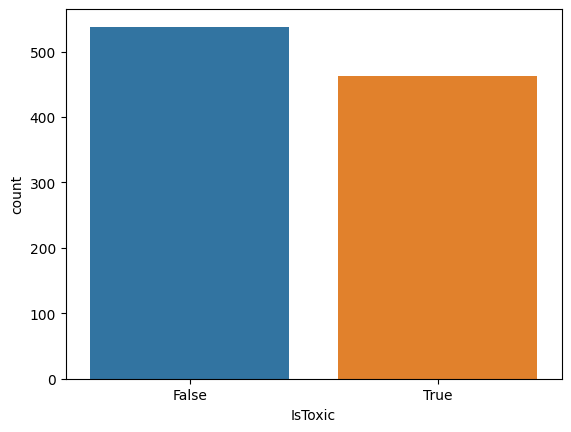

In [4]:
#sns.countplot(data=data,x="IsToxic")
sns.countplot(x ='IsToxic', data = data)

In [5]:
data.describe()
data.tail()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [41]:
data.isnull().sum(axis = 0)

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [42]:
data_duplicadas = data[data.duplicated()]
len(data_duplicadas)

0

In [46]:
data.corr()

,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

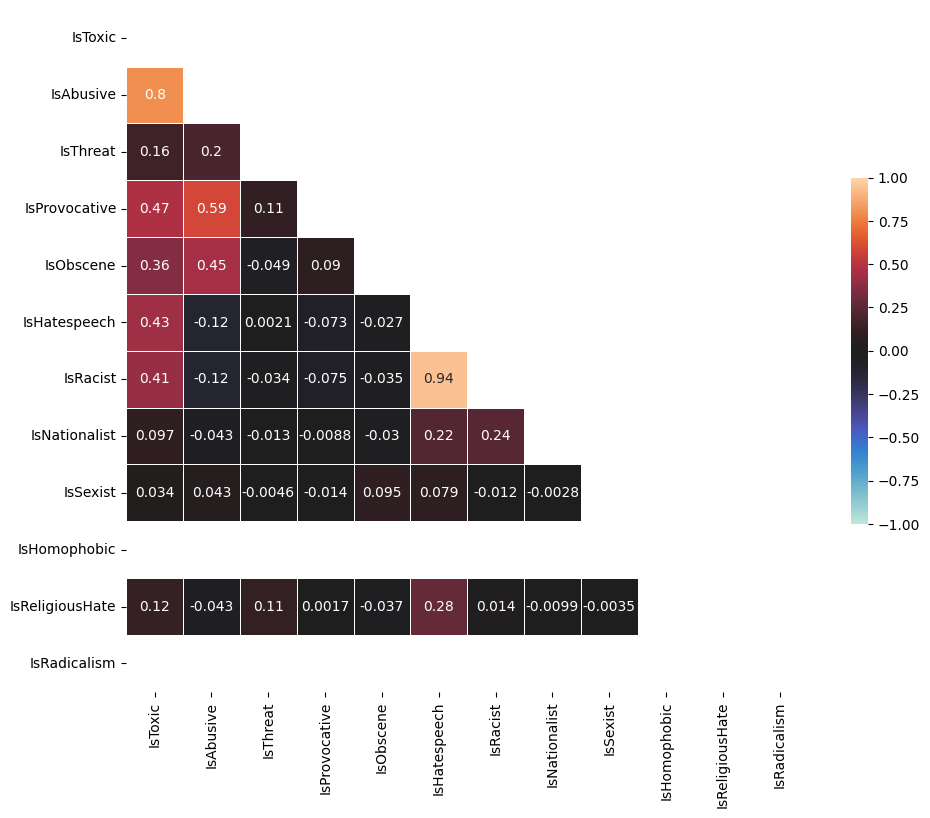

In [53]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(data.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

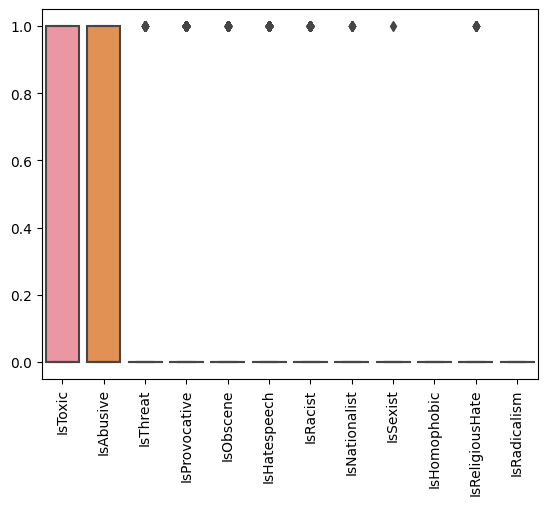

In [62]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

Los datos están un poco equilibrados.
Ahora tenemos que limpiar el texto y vectorizarlo.

## 3. Limpieza de datos

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import string
lemmatize=nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/victor/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
newData = data

Borra espacios xa0

In [9]:
newData['Text'] = newData['Text'].replace(u'\xa0', u' ')

Borra espacios en blanco

In [10]:
newData['Text'] = newData['Text'].str.strip()

Una función que elimina toda la puntuación, todas las palabras de parada, lematiza las palabras y devuelve una lista de tokens del texto limpio

In [11]:
def text_process(mess):
    """
    Toma una cadena de texto y realiza lo siguiente:
    1. Elimina todos los signos de puntuación
    2. Elimina todas las palabras de parada
    3. Lematizar las palabras
    4. Devuelve una lista del texto depurado
    """
    # Comprobar los caracteres para ver si están en la puntuación
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    # Lemmatizar las palabras
    nopunc = [lemmatize.lemmatize(word) for word in nopunc.split()]
    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ' '.join(nopunc)
    
    # Ahora sólo hay que eliminar las palabras de parada
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
text_process('Hello my name is Anabel!! and i am working on this work using rocks and rock')

['hello', 'name', 'anabel', 'working', 'work', 'using', 'rock', 'rock']

Utilizar aplicar para cada texto en los datos

In [13]:
newData['Text'].head(5).apply(text_process)

0    [people, would, take, step, back, make, case, ...
1    [law, enforcement, trained, shoot, apprehend, ...
2    [dont, reckon, black, life, matter, banner, he...
3    [large, number, people, like, police, officer,...
4    [arab, dude, absolutely, right, shot, 6, extra...
Name: Text, dtype: object

## 4. Vectorización de los datos

In [14]:
new_Data = []
df = pd.DataFrame(new_Data)

In [15]:
df['CommentId'] = newData['CommentId']
df['VideoId'] = newData['VideoId']
df['Text'] = newData['Text']
df['IsToxic'] = newData['IsToxic']

In [16]:
df.head()

,CommentId,VideoId,Text,IsToxic
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,Dont you reckon them 'black lives matter' bann...,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])

# Imprimir el número total de palabras del vocabulario
print(len(bow_transformer.vocabulary_))

4386


In [19]:
message4 = df['Text'][3]
print(message4)

There are a very large number of people who do not like police officers. They are called Criminals and its the reason we have police officers. The fact that Criminals do not like police officers is a testament to the good work that police officers do in protecting the public. When our children or our family are in danger, we do not hessitate to call for help, and we call the Police. Its about time people stopped complaining and started to give the Police some respect for the hard work and dedication that often requires them to put their lives on the line, to serve the public.


In [20]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 641)	2
  (0, 642)	1
  (0, 713)	1
  (0, 820)	1
  (0, 961)	2
  (0, 1001)	1
  (0, 1039)	1
  (0, 1430)	1
  (0, 1450)	1
  (0, 1674)	1
  (0, 1694)	1
  (0, 1781)	1
  (0, 1816)	1
  (0, 1829)	1
  (0, 2216)	1
  (0, 2277)	1
  (0, 2283)	2
  (0, 2290)	1
  (0, 2681)	1
  (0, 2707)	4
  (0, 2710)	1
  (0, 2830)	2
  (0, 2902)	6
  (0, 3027)	1
  (0, 3053)	2
  (0, 3081)	1
  (0, 3165)	1
  (0, 3246)	1
  (0, 3256)	1
  (0, 3443)	1
  (0, 3664)	1
  (0, 3711)	1
  (0, 3861)	1
  (0, 3936)	1
  (0, 4291)	2
(1, 4386)


In [21]:
print(bow_transformer.get_feature_names_out()[2902])
print(bow_transformer.get_feature_names_out()[2707])

police
officer


In [22]:
text_bow = bow_transformer.transform(df['Text'])

In [23]:
print('Forma de la matriz dispersa: ', text_bow.shape)
print('Cantidad de ocurrencias no nulas: ', text_bow.nnz)

Forma de la matriz dispersa:  (1000, 4386)
Cantidad de ocurrencias no nulas:  15856


Ahora utilizaremos el TF-IDF para dar peso a cada palabra en los comentarios

TF(t) = (Número de veces que aparece el término t en un documento) / (Número total de términos en el documento). 

IDF(t) = log_e(Número total de documentos / Número de documentos con el término t en él).

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 4291)	0.2120470967470687
  (0, 3936)	0.08369391736037236
  (0, 3861)	0.1617147922778925
  (0, 3711)	0.12564438321929247
  (0, 3664)	0.11976432641897239
  (0, 3443)	0.13363811260110242
  (0, 3256)	0.11511075341292092
  (0, 3246)	0.15262758723850595
  (0, 3165)	0.10901622794005865
  (0, 3081)	0.10338381791641837
  (0, 3053)	0.23620686595889043
  (0, 3027)	0.1411790628409497
  (0, 2902)	0.41530956114947426
  (0, 2830)	0.12173186855109545
  (0, 2710)	0.14618011265623532
  (0, 2707)	0.32686048257534106
  (0, 2681)	0.12564438321929247
  (0, 2290)	0.13064543303457812
  (0, 2283)	0.14104111419376966
  (0, 2277)	0.08869496717565799
  (0, 2216)	0.14618011265623532
  (0, 1829)	0.1617147922778925
  (0, 1816)	0.12564438321929247
  (0, 1781)	0.11810343297944521
  (0, 1694)	0.0924389507876739
  (0, 1674)	0.11247102295580497
  (0, 1450)	0.11375204619529704
  (0, 1430)	0.09348154831840144
  (0, 1039)	0.1617147922778925
  (0, 1001)	0.15262758723850595
  (0, 961)	0.3052551744770119
  (0, 820)	0.161

In [25]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(1000, 4386)


## 5. Entrenamiento del modelo

Divida los datos. El 70% para la formación y el 30% para la prueba.

In [26]:
from sklearn.model_selection import train_test_split

text_train, text_test, toxic_train, toxic_test = \
train_test_split(df['Text'], df['IsToxic'], test_size=0.2)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

800 200 1000


Crear una tubería

Vamos a utilizar el clasificador Naive Bayes para empezar:

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # cadenas a cuentas enteras de tokens
    ('tfidf', TfidfTransformer()),  # integer counts de pesos TF-IDF scores
    ('classifier', MultinomialNB()),  # entreno en TF-IDF vectors w/ Naive Bayes classifier
])

In [28]:
pipeline.fit(text_train,toxic_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fe502fc11b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [29]:
predictions = pipeline.predict(text_test)

In [30]:
print(classification_report(predictions,toxic_test))

              precision    recall  f1-score   support

       False       0.73      0.65      0.69       120
        True       0.55      0.64      0.59        80

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.66      0.65      0.65       200



¡no son realmente buenas puntuaciones!

Probemos con otro clasificador. SVM

In [31]:
from sklearn import svm

In [32]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # cadenas a cuentas enteras de tokens
    ('tfidf', TfidfTransformer()),  # recuentos enteros a puntuaciones TF-IDF ponderadas
    ('classifier', svm.SVC()),  # entrenar en vectores TF-IDF con SVM
])

In [33]:
pipeline2.fit(text_train,toxic_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fe502fc11b0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [34]:
predictions2 = pipeline2.predict(text_test)

In [35]:
print(classification_report(predictions2,toxic_test))

              precision    recall  f1-score   support

       False       0.80      0.66      0.72       131
        True       0.52      0.70      0.59        69

    accuracy                           0.67       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.70      0.67      0.68       200



Un poco mejor pero podría ser mejor jaja, Probemos otro

In [36]:
from sklearn.linear_model import SGDClassifier
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # cadenas a cuentas enteras de tokens
    ('tfidf', TfidfTransformer()),  # recuentos enteros a puntuaciones TF-IDF ponderadas
    ('classifier', SGDClassifier(loss="hinge", max_iter=100)),  # entrenar en vectores TF-IDF con SGD
])
pipeline3.fit(text_train,toxic_train)
predictions3 = pipeline3.predict(text_test)
print(classification_report(predictions3,toxic_test))

              precision    recall  f1-score   support

       False       0.64      0.63      0.63       108
        True       0.57      0.58      0.57        92

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.60      0.61       200



In [37]:
from sklearn import tree
pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # cadenas a cuentas enteras de tokens
    ('tfidf', TfidfTransformer()),  # recuentos enteros a puntuaciones TF-IDF ponderadas
    ('classifier', tree.DecisionTreeClassifier()),  # entrenar en vectores TF-IDF con SGD
])
pipeline4.fit(text_train,toxic_train)
predictions4 = pipeline4.predict(text_test)
print(classification_report(predictions4,toxic_test))

              precision    recall  f1-score   support

       False       0.64      0.64      0.64       108
        True       0.58      0.59      0.58        92

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.61      0.62       200



In [38]:
from sklearn.naive_bayes import BernoulliNB
pipeline5 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # cadenas a cuentas enteras de tokens
    ('tfidf', TfidfTransformer()),  # recuentos enteros a puntuaciones TF-IDF ponderadas
    ('classifier', BernoulliNB()),  # entrenar en vectores TF-IDF con SGD
])
pipeline5.fit(text_train,toxic_train)
predictions5 = pipeline5.predict(text_test)
print(classification_report(predictions5,toxic_test))

              precision    recall  f1-score   support

       False       0.77      0.65      0.70       127
        True       0.52      0.66      0.58        73

    accuracy                           0.65       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.68      0.65      0.66       200

